In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import datetime

# Data

In [2]:
df_ndx = pd.read_csv("data/NDX100.csv")
df_ndx_index_full = pd.read_csv("data/NDX100_index.csv")
df_fred = pd.read_csv("data/fred.csv")

## NASDAQ 100

In [3]:
df_ndx.set_index(df_ndx['Date'], inplace=True)
df_ndx.drop('Date', axis=1, inplace=True)

# log(return) bilden
log_return = df_ndx.apply(lambda x: np.log(x/x.shift(1)))
# erste Zeile = Na, entfernen
log_return = log_return.drop(df_ndx.index[0])
# Aufteilen in 2 hälften
log_return_1 = log_return.head(int(len(log_return)/2))
log_return_2 = log_return.tail(int(len(log_return)/2))

## NASDAQ 100 Index

In [4]:
df_ndx_index = df_ndx_index_full[['Date', 'Adj Close']]
df_ndx_index.set_index(df_ndx_index['Date'], inplace=True)
df_ndx_index.drop('Date', axis=1, inplace=True)
df_ndx_index.rename(columns={'Adj Close':'NDX Index'}, inplace=True)

# log(return) bilden
index_log_return = df_ndx_index.apply(lambda x: np.log(x/x.shift(1)))
# erste Zeile = Na, entfernen
index_log_return = index_log_return.drop(df_ndx_index.index[0])
# Aufteilen in 2 hälften
index_log_return_1 = index_log_return.head(int(len(index_log_return)/2))
index_log_return_2 = index_log_return.tail(int(len(index_log_return)/2))

### NDX Plot

In [5]:
sub = df_ndx_index_full[['Date', 'Adj Close']]

In [6]:
sub.set_index(sub['Date'], inplace=True)
sub.drop('Date', axis=1, inplace=True)
sub.index = pd.to_datetime(sub.index)

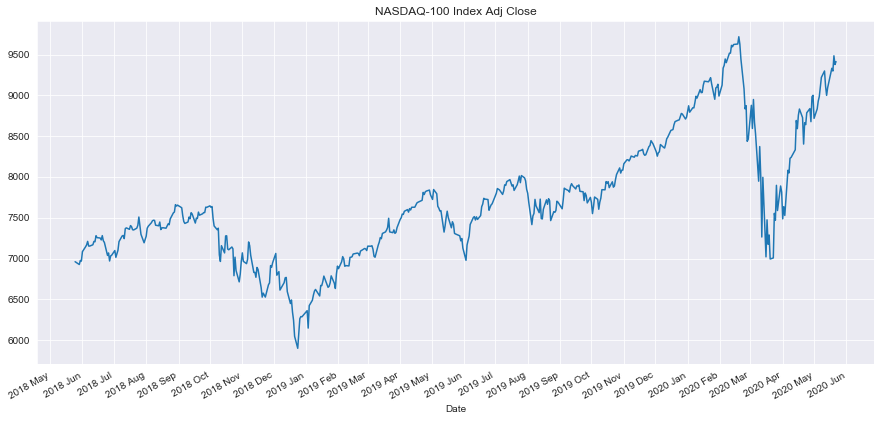

In [7]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(15,7))

sub.plot(ax=ax, legend=None)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y %b"))
ax.set_title("NASDAQ-100 Index Adj Close")

plt.savefig("NDX.png")

## Treasury 6m

In [8]:
df_fred.set_index(df_fred.iloc[:,0], inplace=True)
df_fred.drop(df_fred.columns[0], axis=1, inplace=True)

df_fred.index.name = 'Date'
df_fred.rename(columns={df_fred.columns[0]:'Rate'}, inplace=True)

fred = df_fred.tail(int(len(df_ndx)))
fred.dropna(inplace=True)
# Aufteilen in 2 hälften
fred_1 = fred.head(int(len(fred)/2))
fred_2 = fred.tail(int(len(fred)/2))

## Treasury-Plot

In [9]:
fredplot = fred
fredplot.index = pd.to_datetime(fredplot.index)

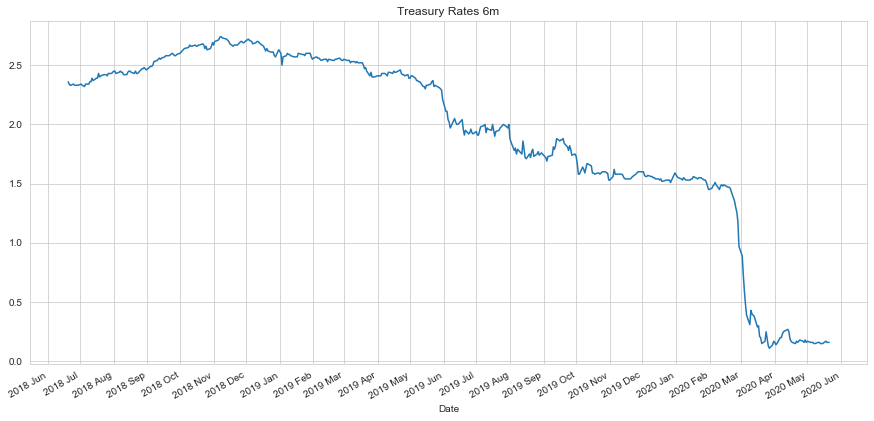

In [10]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15,7))

fredplot.plot(ax=ax, legend=None)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y %b"))
ax.set_title("Treasury Rates 6m")

plt.savefig("fred.png")

# Mittlerer risikofreier Zins

In [11]:
# Mittlere risikofreier Zins über die ganze Reihe
ir_rf = fred.mean()/100

In [12]:
# Mittlere risikofreie Zinsen der aufgeteilten Zeitreihen
ir_rf_1 = fred_1.mean()/100
ir_rf_2 = fred_2.mean()/100

In [44]:
ir_rf_1

Rate    0.025085
dtype: float64

In [45]:
ir_rf_2

Rate    0.013327
dtype: float64

# Mittlere Renditen

In [13]:
# Mittlere Rendite über die ganze Zeitreihe
r_i = log_return.mean()*len(log_return)
# Mittlere Renditen der aufgeteilten Zeitreihen
r_i_1 = log_return_1.mean()*len(log_return_1)
r_i_2 = log_return_2.mean()*len(log_return_2)

In [46]:
r_i_1.mean()

0.07082096084391581

In [47]:
r_i_2.mean()

0.1650065742117644

In [14]:
df = pd.DataFrame({"Exp Ret": r_i,},
                   index=r_i.index)

df1 = pd.DataFrame({"Exp Ret": r_i_1,},
                   index=r_i_1.index)

df2 = pd.DataFrame({"Exp Ret": r_i_2,},
                   index=r_i_2.index)

In [15]:
# Marktportfolio Rendite über die ganze Reihe
r_M = index_log_return.mean()*len(index_log_return)
# Marktportfolio Renditen der aufgeteilten Reihen
r_M_1 = index_log_return_1.mean()*len(index_log_return_1)
r_M_2 = index_log_return_2.mean()*len(index_log_return_2)

In [50]:
r_M

NDX Index    0.301885
dtype: float64

In [48]:
r_M_1

NDX Index    0.047694
dtype: float64

In [49]:
r_M_2

NDX Index    0.257289
dtype: float64

# Volatilitäten

## Standardabweichung

In [16]:
# Vola der Aktien über die ganze Reihe
df['Vola'] = log_return.std()*np.sqrt(len(log_return))
# Volas der Aktien aufgeteilten Reihen
df1['Vola'] = log_return_1.std()*np.sqrt(len(log_return_1))
df2['Vola'] = log_return_2.std()*np.sqrt(len(log_return_2))

In [17]:
# Vola des Marktportfolios über die ganze Reihe
sd_M = index_log_return.std()*np.sqrt(len(index_log_return))
# Vola des Marktportfolios der aufgeteilten Reihen
sd_M_1 = index_log_return_1.std()*np.sqrt(len(index_log_return_1))
sd_M_2 = index_log_return_2.std()*np.sqrt(len(index_log_return_2))

## Kovarianz

In [18]:
df['Cov'] = np.repeat(0, len(df['Vola']))
df1['Cov'] = np.repeat(0, len(df1['Vola']))
df2['Cov'] = np.repeat(0, len(df2['Vola']))

In [19]:
for i in df['Vola'].index:
    # Kovarianz ganze Reihe
    df.loc[i, "Cov"] = np.cov(log_return[i],
    index_log_return.squeeze())[0][1]

for i in df1['Vola'].index:
    # Kovarianz erste hälfte
    df1.loc[i, "Cov"] = np.cov(log_return_1[i],
    index_log_return_1.squeeze())[0][1]

for i in df2['Vola'].index:
    # Kovarianz zweite hälfte
    df2.loc[i, "Cov"] = np.cov(log_return_2[i],
    index_log_return_2.squeeze())[0][1]


# Beta

$$\beta_{i}=\frac{\sigma_{iM}}{\sigma_{M}^{2}}$$

In [20]:
# Beta ganze Reihe
df["Beta"] = df["Cov"]/index_log_return.var()[0]
# Beta's der aufgeteilten Reihen
df1["Beta"] = df1["Cov"]/index_log_return_1.var()[0]
df2["Beta"] = df2["Cov"]/index_log_return_2.var()[0]

# Jenden-Index

$$\hat{\bar{r}}-r_{f}=J+\beta(\hat{\bar{r}}_{M}-r_{f})$$

$$J=\hat{\bar{r}}-r_{f}-\beta(\hat{\bar{r}}_{M}-r_{f})$$

Misst die Höhe über der Wertpapierlinie.

In [21]:
df['Jensen'] = r_i - ir_rf[0] - df["Beta"]*(r_M[0] - ir_rf[0])
df1["Jensen"] = r_i_1 - ir_rf_1[0] - df1["Beta"] * (r_M_1[0] - ir_rf_2[0])
df2["Jensen"] = r_i_2 - ir_rf_2[0] - df2["Beta"] * (r_M_1[0] - ir_rf_2[0])

# Sharpe-Ratio

$$\hat{\bar{r}}-rf=S\sigma$$

$$S=\frac{\hat{\bar{r}}-rf}{\sigma}$$

Misst den Winkel in der ($r-\sigma$)-Ebene.

In [22]:
df["Sharpe"] = (df["Exp Ret"] - ir_rf[0]) / df["Vola"]
df1["Sharpe"] = (df1["Exp Ret"] - ir_rf_1[0]) / df1["Vola"]
df2["Sharpe"] = (df2["Exp Ret"] - ir_rf_2[0]) / df2["Vola"]

In [23]:
df[['Sharpe']].head()

,Sharpe
AAPL,1.055081
ADBE,0.801578
ADI,0.299341
ADP,0.117925
ADSK,0.601146


# Systematisches Risiko

In [24]:
df["Srisk"] = df["Beta"] ** 2 * sd_M[0] ** 2
df1["Srisk"] = df1["Beta"] ** 2 * sd_M_1[0] ** 2
df2["Srisk"] = df2["Beta"] ** 2 * sd_M_2[0] ** 2

In [25]:
df[['Srisk']].head()

,Srisk
AAPL,0.201989
ADBE,0.228523
ADI,0.204434
ADP,0.153388
ADSK,0.231394


# Idiosynkratisches Risiko

In [26]:
df["Irisk"] = df["Vola"] ** 2 - df["Srisk"]
df1["Irisk"] = df1["Vola"] ** 2 - df1["Srisk"]
df2["Irisk"] = df2["Vola"] ** 2 - df2["Srisk"]

In [27]:
df[['Irisk']].head()

,Irisk
AAPL,0.053298
ADBE,0.071897
ADI,0.129332
ADP,0.060726
ADSK,0.146040


In [28]:
df

,Exp Ret,Vola,Cov,Beta,Jensen,Sharpe,Srisk,Irisk
AAPL,0.552295,0.505259,0.000355,1.134543,0.212377,1.055081,0.201989,0.053298
ADBE,0.458555,0.548105,0.000378,1.206763,0.098222,0.801578,0.228523,0.071897
ADI,0.192143,0.577725,0.000358,1.141389,-0.149710,0.299341,0.204434,0.129332
ADP,0.073773,0.462725,0.000310,0.988674,-0.224911,0.117925,0.153388,0.060726
ADSK,0.388524,0.614356,0.000380,1.214320,0.026055,0.601146,0.231394,0.146040
...,...,...,...,...,...,...,...,...
WDAY,0.251263,0.630267,0.000341,1.090204,-0.076121,0.368189,0.186509,0.210727
WDC,-0.629905,0.821183,0.000452,1.442976,-1.057010,-0.790459,0.326741,0.347600
XEL,0.347476,0.408966,0.000171,0.546293,0.173844,0.802682,0.046831,0.120422
XLNX,0.250123,0.626765,0.000327,1.045457,-0.064612,0.368427,0.171513,0.221322


In [29]:
df1

,Exp Ret,Vola,Cov,Beta,Jensen,Sharpe,Srisk,Irisk
AAPL,-0.037197,0.306519,2.099998e-04,1.185248,-0.103016,-0.203192,6.222544e-02,0.031729
ADBE,0.120571,0.335881,2.356614e-04,1.330083,0.049774,0.284284,7.836228e-02,0.034454
ADI,0.050641,0.284663,1.571849e-04,0.887158,-0.004934,0.089774,3.486195e-02,0.046171
ADP,0.234801,0.208904,1.335084e-04,0.753527,0.183818,1.003883,2.515054e-02,0.018490
ADSK,0.194302,0.381895,2.499000e-04,1.410445,0.120743,0.443097,8.811757e-02,0.057727
...,...,...,...,...,...,...,...,...
WDAY,0.476937,0.403693,2.380159e-04,1.343371,0.405684,1.119296,7.993595e-02,0.083032
WDC,-0.705605,0.466586,2.246374e-04,1.267863,-0.774264,-1.566037,7.120234e-02,0.146500
XEL,0.298197,0.164617,7.844574e-07,0.004428,0.272959,1.659068,8.682981e-07,0.027098
XLNX,0.390077,0.434292,1.970583e-04,1.112205,0.326768,0.840429,5.479229e-02,0.133817


In [30]:
df2

,Exp Ret,Vola,Cov,Beta,Jensen,Sharpe,Srisk,Irisk
AAPL,0.593635,0.401272,0.000502,1.113140,0.542053,1.446173,0.139820,0.021199
ADBE,0.325398,0.433574,0.000523,1.159067,0.272238,0.719765,0.151596,0.036391
ADI,0.154902,0.503181,0.000560,1.241372,0.098912,0.281360,0.173890,0.079302
ADP,-0.161275,0.413025,0.000489,1.083352,-0.211834,-0.422739,0.132437,0.038153
ADSK,0.195028,0.482023,0.000514,1.138376,0.142579,0.376956,0.146232,0.086115
...,...,...,...,...,...,...,...,...
WDAY,-0.235825,0.483687,0.000449,0.994789,-0.283340,-0.515109,0.111669,0.122285
WDC,0.110460,0.674929,0.000681,1.508870,0.045278,0.143917,0.256906,0.198624
XEL,0.065687,0.374283,0.000343,0.759792,0.026248,0.139894,0.065142,0.074946
XLNX,-0.144784,0.452131,0.000461,1.022338,-0.193246,-0.349700,0.117939,0.086483


In [31]:
df.loc[["GOOG", "GOOGL", "AAPL", "FB", "AMZN", "MSFT"], ]

,Exp Ret,Vola,Cov,Beta,Jensen,Sharpe,Srisk,Irisk
GOOG,0.270953,0.450701,0.000312,0.995145,-0.029560,0.558568,0.155402,0.047729
GOOGL,0.265153,0.451145,0.000314,1.002046,-0.037310,0.545163,0.157565,0.045966
AAPL,0.552295,0.505259,0.000355,1.134543,0.212377,1.055081,0.201989,0.053298
FB,0.239279,0.551843,0.000328,1.046251,-0.075680,0.398797,0.171774,0.132757
AMZN,0.414391,0.468631,0.000295,0.941358,0.129083,0.843276,0.139058,0.080557
MSFT,0.651973,0.474231,0.000353,1.127129,0.314151,1.334302,0.199357,0.025537


# Kapitalmarktlinie

In [32]:
def lin_fun(x,a,b):
    return a+x*b

## erste hälfte

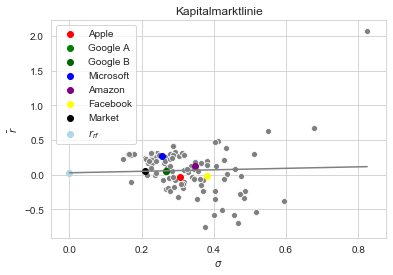

In [39]:
# Punkte der cml
x = np.linspace(0, max(df1["Vola"]), len(df1["Vola"]))
y = lin_fun(x=x, a=ir_rf_1[0], b=(r_M_1[0] - ir_rf_1[0]) / sd_M_1[0])

# cml-Plot
sns.scatterplot(x="Vola", y="Exp Ret", data=df1, color="grey")
sns.lineplot(x=x, y=y, color="grey")

plt.scatter(
    x=df1.loc[["AAPL"]]["Vola"][0],
    y=df1.loc[["AAPL"]]["Exp Ret"][0],
    color="red",
    label="Apple",
)
plt.scatter(
    x=df1.loc[["GOOG"]]["Vola"][0],
    y=df1.loc[["GOOG"]]["Exp Ret"][0],
    color="green",
    label="Google A",
)
plt.scatter(
    x=df1.loc[["GOOGL"]]["Vola"][0],
    y=df1.loc[["GOOGL"]]["Exp Ret"][0],
    color="darkgreen",
    label="Google B",
)
plt.scatter(
    x=df1.loc[["MSFT"]]["Vola"][0],
    y=df1.loc[["MSFT"]]["Exp Ret"][0],
    color="blue",
    label="Microsoft",
)
plt.scatter(
    x=df1.loc[["AMZN"]]["Vola"][0],
    y=df1.loc[["AMZN"]]["Exp Ret"][0],
    color="purple",
    label="Amazon",
)
plt.scatter(
    x=df1.loc[["FB"]]["Vola"][0],
    y=df1.loc[["FB"]]["Exp Ret"][0],
    color="yellow",
    label="Facebook",
)
plt.scatter(x=sd_M_1, y=r_M_1, label="Market", color="black")
plt.scatter(x=0, y=ir_rf_1, label=r"$r_{rf}$", color="lightblue")
plt.xlabel(r"$\sigma$")
plt.ylabel(r"$\bar{r}$")
plt.title("Kapitalmarktlinie")
plt.legend()

## zweite hälfte

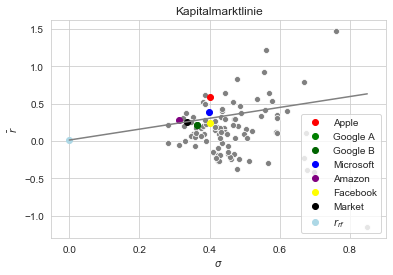

In [40]:
# Punkte der cml
x = np.linspace(0, max(df2["Vola"]), len(df2["Vola"]))
y = lin_fun(x=x, a=ir_rf_2[0], b=(r_M_2[0] - ir_rf_2[0]) / sd_M_2[0])

# cml-Plot
sns.scatterplot(x="Vola", y="Exp Ret", data=df2, color="grey")
sns.lineplot(x=x, y=y, color="grey")

plt.scatter(
    x=df2.loc[["AAPL"]]["Vola"][0],
    y=df2.loc[["AAPL"]]["Exp Ret"][0],
    color="red",
    label="Apple",
)
plt.scatter(
    x=df2.loc[["GOOG"]]["Vola"][0],
    y=df2.loc[["GOOG"]]["Exp Ret"][0],
    color="green",
    label="Google A",
)
plt.scatter(
    x=df2.loc[["GOOGL"]]["Vola"][0],
    y=df2.loc[["GOOGL"]]["Exp Ret"][0],
    color="darkgreen",
    label="Google B",
)
plt.scatter(
    x=df2.loc[["MSFT"]]["Vola"][0],
    y=df2.loc[["MSFT"]]["Exp Ret"][0],
    color="blue",
    label="Microsoft",
)
plt.scatter(
    x=df2.loc[["AMZN"]]["Vola"][0],
    y=df2.loc[["AMZN"]]["Exp Ret"][0],
    color="purple",
    label="Amazon",
)
plt.scatter(
    x=df2.loc[["FB"]]["Vola"][0],
    y=df2.loc[["FB"]]["Exp Ret"][0],
    color="yellow",
    label="Facebook",
)
plt.scatter(x=sd_M_2, y=r_M_2, label="Market", color="black")
plt.scatter(x=0, y=ir_rf_2, label=r"$r_{rf}$", color="lightblue")
plt.xlabel(r"$\sigma$")
plt.ylabel(r"$\bar{r}$")
plt.title("Kapitalmarktlinie")
plt.legend()

## Beide Jahre

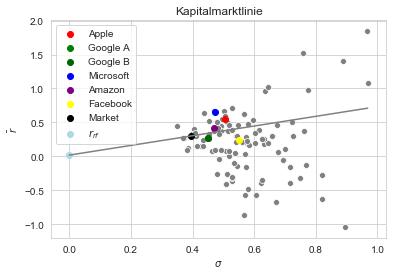

In [41]:
# Punkte der cml
x = np.linspace(0, max(df["Vola"]), len(df["Vola"]))
y = lin_fun(x=x, a=ir_rf[0], b=(r_M[0] - ir_rf[0]) / sd_M[0])

# cml-Plot
sns.scatterplot(x="Vola", y="Exp Ret", data=df, color="grey")
sns.lineplot(x=x, y=y, color="grey")

plt.scatter(
    x=df.loc[["AAPL"]]["Vola"][0],
    y=df.loc[["AAPL"]]["Exp Ret"][0],
    color="red",
    label="Apple",
)
plt.scatter(
    x=df.loc[["GOOG"]]["Vola"][0],
    y=df.loc[["GOOG"]]["Exp Ret"][0],
    color="green",
    label="Google A",
)
plt.scatter(
    x=df.loc[["GOOGL"]]["Vola"][0],
    y=df.loc[["GOOGL"]]["Exp Ret"][0],
    color="darkgreen",
    label="Google B",
)
plt.scatter(
    x=df.loc[["MSFT"]]["Vola"][0],
    y=df.loc[["MSFT"]]["Exp Ret"][0],
    color="blue",
    label="Microsoft",
)
plt.scatter(
    x=df.loc[["AMZN"]]["Vola"][0],
    y=df.loc[["AMZN"]]["Exp Ret"][0],
    color="purple",
    label="Amazon",
)
plt.scatter(
    x=df.loc[["FB"]]["Vola"][0],
    y=df.loc[["FB"]]["Exp Ret"][0],
    color="yellow",
    label="Facebook",
)
plt.scatter(x=sd_M, y=r_M, label="Market", color="black")
plt.scatter(x=0, y=ir_rf, label=r"$r_{rf}$", color="lightblue")
plt.xlabel(r"$\sigma$")
plt.ylabel(r"$\bar{r}$")
plt.title("Kapitalmarktlinie")
plt.legend()

# Wertpapierlinie

## erste hälfe

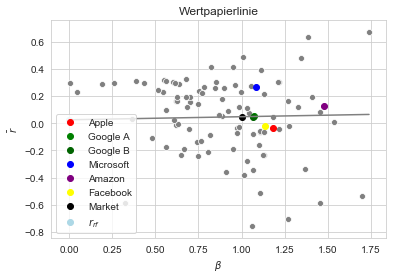

In [37]:
sns.scatterplot(x="Beta", y="Exp Ret", data=df1, color="grey")
sns.lineplot(x=x, y=y, color="grey")
plt.scatter(
    x=df1.loc[["AAPL"]]["Beta"][0],
    y=df1.loc[["AAPL"]]["Exp Ret"][0],
    color="red",
    label="Apple",
)
plt.scatter(
    x=df1.loc[["GOOG"]]["Beta"][0],
    y=df1.loc[["GOOG"]]["Exp Ret"][0],
    color="green",
    label="Google A",
)
plt.scatter(
    x=df1.loc[["GOOGL"]]["Beta"][0],
    y=df1.loc[["GOOGL"]]["Exp Ret"][0],
    color="darkgreen",
    label="Google B",
)
plt.scatter(
    x=df1.loc[["MSFT"]]["Beta"][0],
    y=df1.loc[["MSFT"]]["Exp Ret"][0],
    color="blue",
    label="Microsoft",
)
plt.scatter(
    x=df1.loc[["AMZN"]]["Beta"][0],
    y=df1.loc[["AMZN"]]["Exp Ret"][0],
    color="purple",
    label="Amazon",
)
plt.scatter(
    x=df1.loc[["FB"]]["Beta"][0],
    y=df1.loc[["FB"]]["Exp Ret"][0],
    color="yellow",
    label="Facebook",
)

plt.scatter(x=1, y=r_M_1, label="Market", color="black")
plt.scatter(x=0, y=ir_rf_1, label=r"$r_{rf}$", color="lightblue")

plt.xlabel(r"$\beta$")
plt.ylabel(r"$\bar{r}$")
plt.title("Wertpapierlinie")
plt.legend()

## zweite hälfte

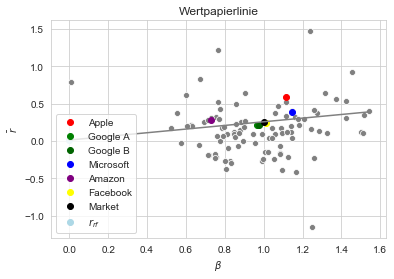

In [38]:
x = np.linspace(0, max(df2["Beta"]), len(df2["Beta"]))
y = lin_fun(x=x, a=ir_rf_2[0], b=r_M_2[0] - ir_rf_2[0])

sns.scatterplot(x="Beta", y="Exp Ret", data=df2, color="grey")
sns.lineplot(x=x, y=y, color="grey")
plt.scatter(
    x=df2.loc[["AAPL"]]["Beta"][0],
    y=df2.loc[["AAPL"]]["Exp Ret"][0],
    color="red",
    label="Apple",
)
plt.scatter(
    x=df2.loc[["GOOG"]]["Beta"][0],
    y=df2.loc[["GOOG"]]["Exp Ret"][0],
    color="green",
    label="Google A",
)
plt.scatter(
    x=df2.loc[["GOOGL"]]["Beta"][0],
    y=df2.loc[["GOOGL"]]["Exp Ret"][0],
    color="darkgreen",
    label="Google B",
)
plt.scatter(
    x=df2.loc[["MSFT"]]["Beta"][0],
    y=df2.loc[["MSFT"]]["Exp Ret"][0],
    color="blue",
    label="Microsoft",
)
plt.scatter(
    x=df2.loc[["AMZN"]]["Beta"][0],
    y=df2.loc[["AMZN"]]["Exp Ret"][0],
    color="purple",
    label="Amazon",
)
plt.scatter(
    x=df2.loc[["FB"]]["Beta"][0],
    y=df2.loc[["FB"]]["Exp Ret"][0],
    color="yellow",
    label="Facebook",
)

plt.scatter(x=1, y=r_M_2, label="Market", color="black")
plt.scatter(x=0, y=ir_rf_2, label=r"$r_{rf}$", color="lightblue")

plt.xlabel(r"$\beta$")
plt.ylabel(r"$\bar{r}$")
plt.title("Wertpapierlinie")
plt.legend()

## beide Jahre

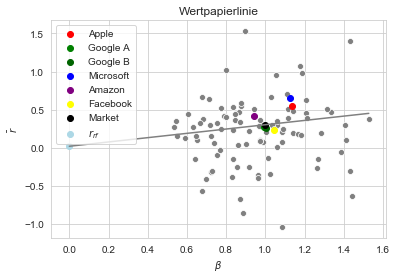

In [42]:
x = np.linspace(0, max(df["Beta"]), len(df["Beta"]))
y = lin_fun(x=x, a=ir_rf[0], b=r_M[0] - ir_rf[0])

sns.scatterplot(x="Beta", y="Exp Ret", data=df, color="grey")
sns.lineplot(x=x, y=y, color="grey")
plt.scatter(
    x=df.loc[["AAPL"]]["Beta"][0],
    y=df.loc[["AAPL"]]["Exp Ret"][0],
    color="red",
    label="Apple",
)
plt.scatter(
    x=df.loc[["GOOG"]]["Beta"][0],
    y=df.loc[["GOOG"]]["Exp Ret"][0],
    color="green",
    label="Google A",
)
plt.scatter(
    x=df.loc[["GOOGL"]]["Beta"][0],
    y=df.loc[["GOOGL"]]["Exp Ret"][0],
    color="darkgreen",
    label="Google B",
)
plt.scatter(
    x=df.loc[["MSFT"]]["Beta"][0],
    y=df.loc[["MSFT"]]["Exp Ret"][0],
    color="blue",
    label="Microsoft",
)
plt.scatter(
    x=df.loc[["AMZN"]]["Beta"][0],
    y=df.loc[["AMZN"]]["Exp Ret"][0],
    color="purple",
    label="Amazon",
)
plt.scatter(
    x=df.loc[["FB"]]["Beta"][0],
    y=df.loc[["FB"]]["Exp Ret"][0],
    color="yellow",
    label="Facebook",
)

plt.scatter(x=1, y=r_M, label="Market", color="black")
plt.scatter(x=0, y=ir_rf, label=r"$r_{rf}$", color="lightblue")

plt.xlabel(r"$\beta$")
plt.ylabel(r"$\bar{r}$")
plt.title("Wertpapierlinie")
plt.legend()